# Perceptrón simple

## descripción 

la neurona artificial o unidad básica de inferencia en forma de discriminador lineal, a partir de lo cual se desarrolla un algoritmo capaz de generar un criterio para seleccionar un subgrupo a partir de un grupo de componentes más grande.

La limitación de este algoritmo es que si dibujamos en un gráfico estos elementos, se deben poder separar con un hiperplano únicamente los elementos "deseados" discriminándolos (separándolos) de los "no deseados". 

<img src= 'img/MLP_02.png'>

donde;

- $x(j)$ denota el elemento en la posición $j$ en el vector de la entrada
- $w(j)$ el elemento en la posición $j$ en el vector de peso
- $y$ denota la salida de la neurona
- La función de activación $f(x)$; el caso más simple devuelve: 
$$f(x) = 0, si \sum {w_j*x_i} + b <= 0$$ 
$$f(x) = 1, si \sum {w_j*x_i} + b > 0$$

# datos linealmente separables

In [1]:
import pandas as pd

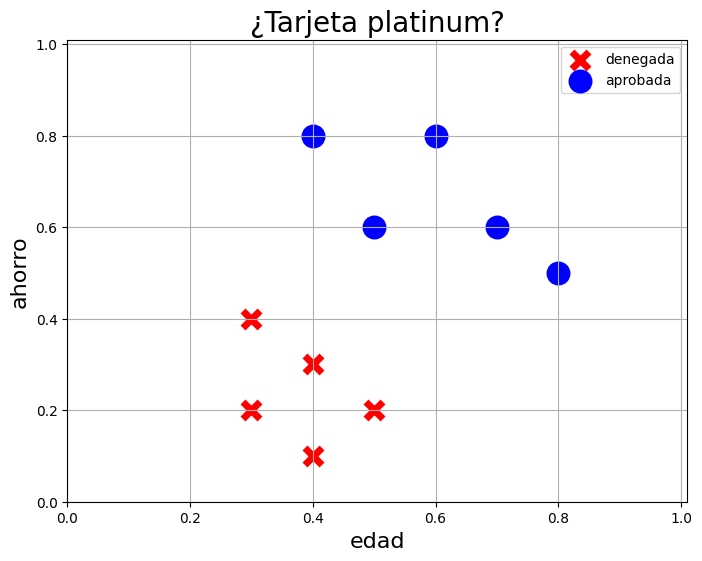

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# datos de 10 perosnas [edad, ahorro] escalado entre 0 y 1 edad 0.4 -- 40 años ahorro 0.5 -- 50000 € etc

personas = np.array([[0.3, 0.4],
                     [0.4, 0.3], 
                     [0.3, 0.2], 
                     [0.4, 0.1], 
                     [0.5, 0.2], 
                     [0.4, 0.8], 
                     [0.6, 0.8], 
                     [0.5, 0.6], 
                     [0.7, 0.6], 
                     [0.8, 0.5]])

# etiquetas: 0 denegada 1 aprobada
clases = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

# grafica de dispersión edad vs ahorro

plt.figure(figsize= (8, 6))
plt.title('¿Tarjeta platinum?', fontsize= 20)
plt.scatter(personas[clases == 0].T[0],
            personas[clases == 0].T[1],
            marker= 'x', s= 150, color= 'red', linewidths=5, label= 'denegada')

plt.scatter(personas[clases == 1].T[0],
            personas[clases == 1].T[1],
            marker= 'o', s= 150, color= 'blue', linewidths=5, label= 'aprobada')
plt.ylabel('ahorro', fontsize= 16)
plt.xlabel('edad', fontsize= 16)
plt.legend(loc= 'upper right', ) # bbox_to_anchor= (1.3, 0.15)
plt.ylim(0,1.01)
plt.xlim(0, 1.01)

plt.grid()
plt.show()

# Perceptrón simple para nuestro caso

<img src= 'img/MLP_01.png'>

# Función de activación: la más básica ---> escalón

$$f(x) = 0, si \sum {w_j*x_i} + b <= 0$$ 
$$f(x) = 1, si \sum {w_j*x_i} + b > 0$$

In [3]:
print(personas)
personas.shape

[[0.3 0.4]
 [0.4 0.3]
 [0.3 0.2]
 [0.4 0.1]
 [0.5 0.2]
 [0.4 0.8]
 [0.6 0.8]
 [0.5 0.6]
 [0.7 0.6]
 [0.8 0.5]]


(10, 2)

In [4]:
def inicializar_pesos(inputs):

    # inicialicación de los pesos y sesgo
    #np.random.seed(42)
    weights = {'w_'+ str(i): np.random.uniform(low=-1, high=1) for i in range(inputs.shape[1] + 1)}

    for weight, value in weights.items():
        print(f'The value of the weight: {weight} is: ---> {value}')
    print('\n')
        
    return pd.Series(weights)


def activacion(inputs, weights):

    z = np.sum(inputs*weights[1:].values) + weights[0]
    # print(z)
    
    if z > 0:
        return 1
    else:
        return 0


In [5]:
pesos = inicializar_pesos(personas)

The value of the weight: w_0 is: ---> -0.29166732809472906
The value of the weight: w_1 is: ---> 0.25059665065254166
The value of the weight: w_2 is: ---> 0.45451705057009373




In [6]:
pruebas = np.array([[0.6, 0.7], [0.25,0.1], [0.17, 0.9]])
print(activacion(pruebas[0], weights= pesos))
print(activacion(pruebas[1], weights= pesos))
print(activacion(pruebas[2], weights= pesos))

1
0
1


# pseudocódgo del entrenamiento del perceptrón simple

0. Inicalizar pesos
1. Definir, epocas, learning_rate, función de activacion (En este caso fijada)
2. for epoca in epocas:
- calcula la salida del perceptron para un batch size de entradas; puede ser de 1 a el tamaño del dataset
- Calcula el error
- Actualiza el pesos

# entrenamiento del perceptrón

In [18]:
def perceptron_simple(inputs, labels, f_activacion, epocas= 1000, learning_rate= 0.01):
    
    weights = inicializar_pesos(inputs)
    for epoca in range(epocas):                                 # para cada epoca
        error_total = 0
        # np.random.shuffle(inputs)
        print('epoca ===> ',epoca +1)
        for i in range(0, len(inputs)):                         # para cada batch size: por ahora el batch size será de 1
            
            prediccion = f_activacion(inputs[i], weights)       # haz una prediccion
            error = labels[i] - prediccion                      # calcula el error
            error_total += error**2
            print(f'clase: {labels[i]}, prediccion: {prediccion}')
            
            # actualización de pesos: DESCENSO DE GRADIENTE super SIMPLE
            for n in range(1, len(weights[1:].values) + 1):               # para cada peso desde 1 hasta la cantidad de features (ahora 2)
                weights.values[n] += learning_rate*(inputs[i][n-1])*error #  actualiza el peso correspondiente

            weights.values[0] += learning_rate*error                      # actualiza el bias

            # weights[0] += learning_rate*error
            # weights[1] += learning_rate*inputs[i][0]*error
            # weights[2] += learning_rate*inputs[i][1]*error

        print(error_total)
        print('\n')
        # print(weights.values)
    
    return weights

weights = perceptron_simple(personas, clases, activacion, epocas= 100)

The value of the weight: w_0 is: ---> -0.3291804068582189
The value of the weight: w_1 is: ---> -0.09846159894038031
The value of the weight: w_2 is: ---> -0.09057156022299151


epoca ===>  1
clase: 0, prediccion: 0
clase: 0, prediccion: 0
clase: 0, prediccion: 0
clase: 0, prediccion: 0
clase: 0, prediccion: 0
clase: 1, prediccion: 0
clase: 1, prediccion: 0
clase: 1, prediccion: 0
clase: 1, prediccion: 0
clase: 1, prediccion: 0
5


epoca ===>  2
clase: 0, prediccion: 0
clase: 0, prediccion: 0
clase: 0, prediccion: 0
clase: 0, prediccion: 0
clase: 0, prediccion: 0
clase: 1, prediccion: 0
clase: 1, prediccion: 0
clase: 1, prediccion: 0
clase: 1, prediccion: 0
clase: 1, prediccion: 0
5


epoca ===>  3
clase: 0, prediccion: 0
clase: 0, prediccion: 0
clase: 0, prediccion: 0
clase: 0, prediccion: 0
clase: 0, prediccion: 0
clase: 1, prediccion: 0
clase: 1, prediccion: 0
clase: 1, prediccion: 0
clase: 1, prediccion: 0
clase: 1, prediccion: 0
5


epoca ===>  4
clase: 0, prediccion: 0
clase: 0, 

In [19]:
print(weights)

w_0   -0.069180
w_1    0.056538
w_2    0.080428
dtype: float64


### mi algoritmo no funciona correctamente...

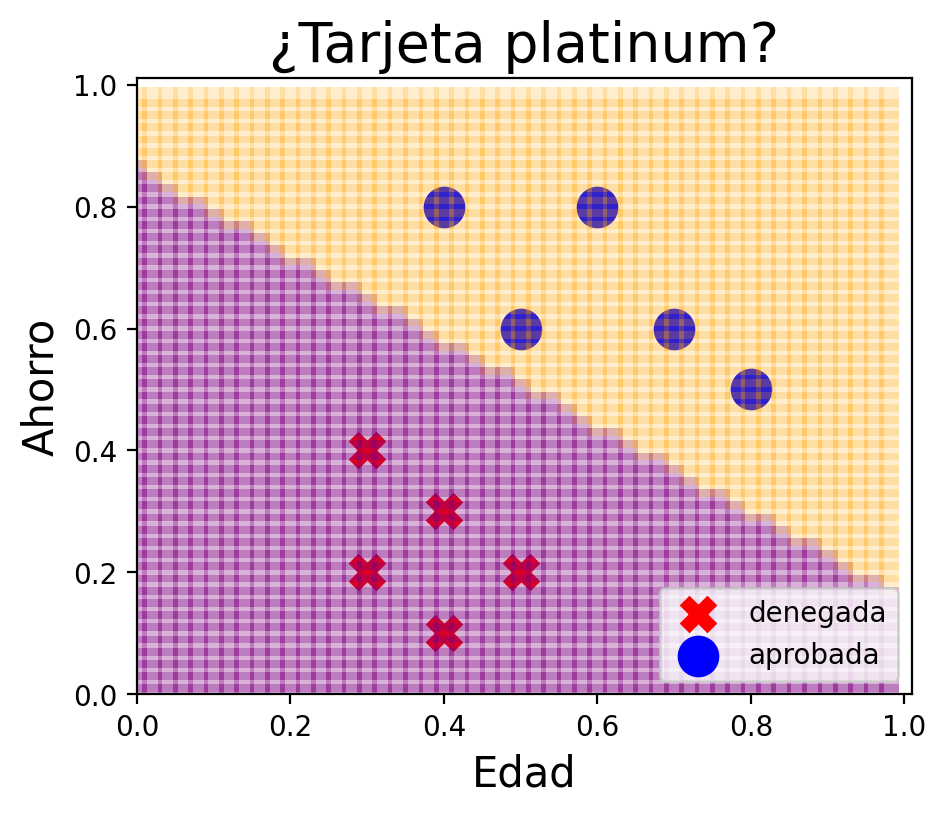

In [20]:
plt.figure(figsize= (5, 4), dpi= 200)

plt.title('¿Tarjeta platinum?', fontsize= 20)
plt.scatter(personas[clases == 0].T[0],
            personas[clases == 0].T[1],
            marker= 'x', s= 100, color= 'red', linewidths=5, label= 'denegada')

plt.scatter(personas[clases == 1].T[0],
            personas[clases == 1].T[1],
            marker= 'o', s= 100, color= 'blue', linewidths=5, label= 'aprobada')

for edad in np.arange(0, 1, 0.02):
    for ahorro in np.arange(0, 1, 0.02):
        color= activacion(np.array([edad, ahorro]), weights)
        if color == 1:
            plt.scatter(edad, ahorro, marker= 's', s= 50, color= 'orange', alpha= 0.2, linewidths=0)
        else:
            plt.scatter(edad, ahorro, marker= 's', s= 50, color= 'purple', alpha= 0.3, linewidths=0)

plt.xlabel('Edad', fontsize= 15)
plt.ylabel('Ahorro', fontsize= 15)
plt.legend()
plt.xlim(0, 1.01)
plt.ylim(0, 1.01)
plt.show()

# Perceptrón en sklearn

## parametros

- **penalty**: {‘l2’,’l1’,’elasticnet’}, default=None

The penalty (aka regularization term) to be used.
    
- **alpha**: float, default=0.0001

Constant that multiplies the regularization term if regularization is used.

- **l1_ratio**: float, default=0.15

The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1. l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1. Only used if penalty='elasticnet'.

- **fit_intercept**: bool, default=True

    Whether the intercept should be estimated or not. If False, the data is assumed to be already centered.

- **max_iter**: int, default=1000

The maximum number of passes over the training data (aka epochs). It only impacts the behavior in the fit method, and not the partial_fit method.

- **tol**: float or None, default=1e-3

The stopping criterion. If it is not None, the iterations will stop when (loss > previous_loss - tol).

- **shuffle**: bool, default=True

Whether or not the training data should be shuffled after each epoch.

- **verbose**: int, default=0

The verbosity level.

- **eta0**: float, default=1

Constant by which the updates are multiplied.

- **n_jobs**: int, default=None

The number of CPUs to use to do the OVA (One Versus All, for multi-class problems) computation. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.

- **random_state**: int, RandomState instance or None, default=0

Used to shuffle the training data, when shuffle is set to True. Pass an int for reproducible output across multiple function calls.

- **early_stopping:** bool, default=False

Whether to use early stopping to terminate training when validation. score is not improving. If set to True, it will automatically set aside a stratified fraction of training data as validation and terminate training when validation score is not improving by at least tol for n_iter_no_change consecutive epochs.

- **validation_fraction:** float, default=0.1

 The proportion of training data to set aside as validation set for early stopping. Must be between 0 and 1. Only used if early_stopping is True.


- **n_iter_no_change**: int, default=5

Number of iterations with no improvement to wait before early stopping.

- **class_weight**: dict, {class_label: weight} or “balanced”, default=None

Preset for the class_weight fit parameter.

Weights associated with classes. If not given, all classes are supposed to have weight one.

The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).

- **warm_start**: bool, default=False

    When set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution.

In [21]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron(penalty=None, 
                        alpha=0,
                        l1_ratio=0, 
                        fit_intercept=True,
                        max_iter=1000, 
                        tol= 0.0001, 
                        shuffle= True, 
                        verbose=0, 
                        eta0= 0.1, 
                        n_jobs= None, 
                        early_stopping= False, 
                        validation_fraction= 0.1, 
                        class_weight= None, 
                        n_iter_no_change= 5, 
                        warm_start= False)

perceptron.fit(personas, clases)
perceptron.predict([[0.5, 0.6], [0.19, 0.6]])


array([1, 0])

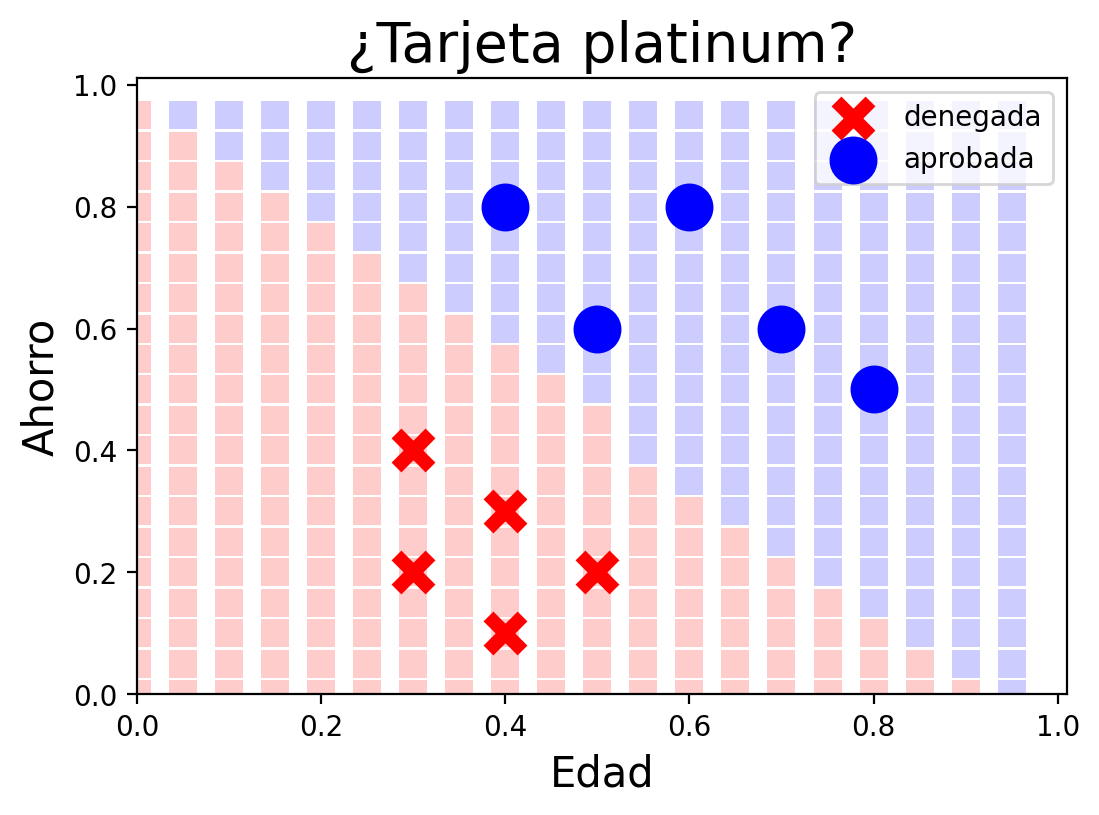

In [22]:
plt.figure(figsize= (6, 4), dpi= 200)

plt.title('¿Tarjeta platinum?', fontsize= 20)
plt.scatter(personas[clases == 0].T[0],
            personas[clases == 0].T[1],
            marker= 'x', s= 150, color= 'red', linewidths=5, label= 'denegada')

plt.scatter(personas[clases == 1].T[0],
            personas[clases == 1].T[1],
            marker= 'o', s= 150, color= 'blue', linewidths=5, label= 'aprobada')

for edad in np.arange(0, 1, 0.05):
    for ahorro in np.arange(0, 1, 0.05):
        color= perceptron.predict(np.array([[edad, ahorro]]))
        if color == 1:
            plt.scatter(edad, ahorro, marker= 's', s= 100, color= 'blue', alpha= 0.2, linewidths=0)
        else:
            plt.scatter(edad, ahorro, marker= 's', s= 100, color= 'red', alpha= 0.2, linewidths=0)

plt.xlabel('Edad', fontsize= 15)
plt.ylabel('Ahorro', fontsize= 15)
plt.legend()
plt.xlim(0, 1.01)
plt.ylim(0, 1.01)
plt.show()